In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [3]:
data = pd.read_csv('sentiment dataset.csv')
data

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


In [4]:
data.shape

(732, 15)

In [5]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [7]:
data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [8]:
data

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


In [9]:
objective_data = data.select_dtypes(include=['object']).columns
objective_data

Index(['Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags',
       'Country'],
      dtype='object')

In [10]:
for i in objective_data:
    data[i] = data[i].str.strip()

In [11]:
data['Sentiment'].value_counts()

Positive          45
Joy               44
Excitement        37
Contentment       19
Neutral           18
                  ..
LostLove           1
EmotionalStorm     1
Suffering          1
Bittersweet        1
Intrigue           1
Name: Sentiment, Length: 191, dtype: int64

In [79]:
data['Sentiment'].nunique()

191

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Positive'),
  Text(1, 0, 'Joy'),
  Text(2, 0, 'Excitement'),
  Text(3, 0, 'Contentment'),
  Text(4, 0, 'Neutral'),
  Text(5, 0, 'Gratitude'),
  Text(6, 0, 'Curiosity'),
  Text(7, 0, 'Serenity'),
  Text(8, 0, 'Happy'),
  Text(9, 0, 'Nostalgia')])

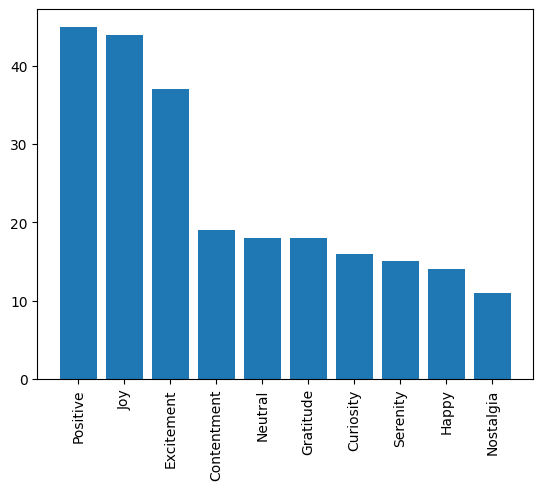

In [12]:
top_sentiment = data['Sentiment'].value_counts().nlargest(10)
plt.bar(top_sentiment.index, top_sentiment.values)
plt.xticks(rotation=90)

In [13]:
data['Platform'].value_counts()

Instagram    258
Twitter      243
Facebook     231
Name: Platform, dtype: int64

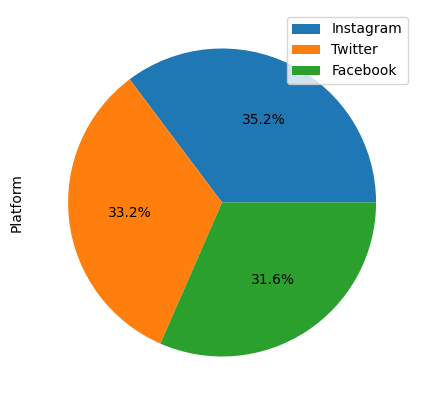

In [19]:
platform_percent = data['Platform'].value_counts(normalize=True)
plt.figure(figsize=(10, 5))
platform_percent.plot(kind='pie', autopct='%1.1f%%', labels=None)
plt.legend(labels=platform_percent.index, loc='upper right')

In [15]:
data['Country'].value_counts()

USA               188
UK                143
Canada            135
Australia          75
India              70
Brazil             17
France             16
Japan              15
Germany            14
Italy              11
Spain               6
South Africa        6
Greece              5
Netherlands         4
Switzerland         3
Portugal            2
Austria             2
Belgium             2
Denmark             2
Czech Republic      2
Sweden              2
Colombia            1
Scotland            1
Kenya               1
Jamaica             1
Ireland             1
China               1
Norway              1
Cambodia            1
Maldives            1
Peru                1
Jordan              1
Thailand            1
Name: Country, dtype: int64

<BarContainer object of 10 artists>

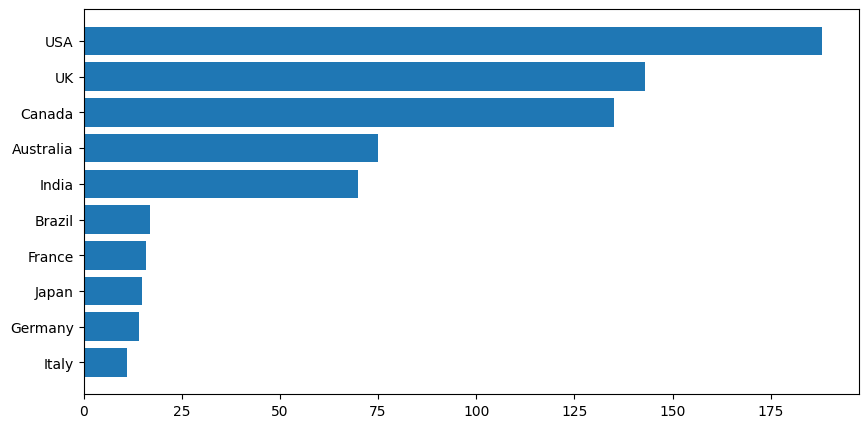

In [16]:
top_country_comment = data['Country'].value_counts().nlargest(10).sort_values(ascending=True)
plt.figure(figsize=(10, 5))
plt.barh(top_country_comment.index, top_country_comment.values)

<BarContainer object of 3 artists>

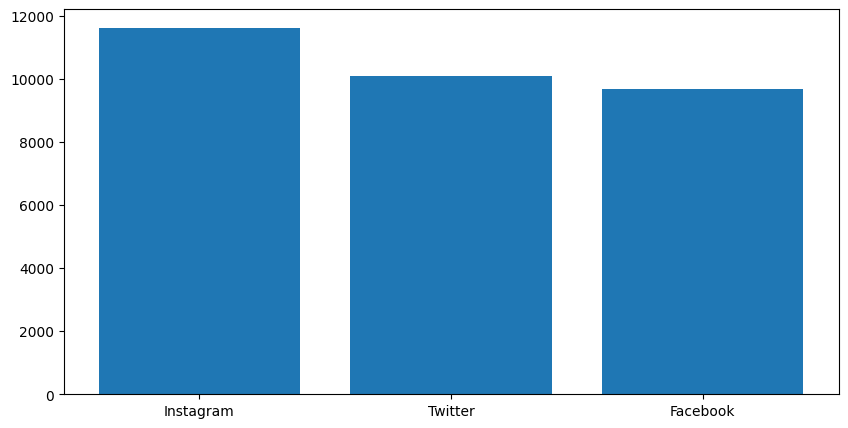

In [22]:
like_from_social = data.groupby('Platform')['Likes'].sum().sort_values(ascending=False)
like_from_social

plt.figure(figsize=(10, 5))
plt.bar(like_from_social.index, like_from_social.values)

In [27]:
fb_likes_by_year = data[data['Platform'] == 'Facebook'].groupby('Year')['Likes'].sum()
fb_likes_by_year

Year
2011      95.0
2012      60.0
2013      45.0
2015     425.0
2016     740.0
2017     479.0
2018     649.0
2019     592.0
2020     999.0
2021     937.0
2022     886.0
2023    3765.0
Name: Likes, dtype: float64

In [28]:
ig_likes_by_year = data[data['Platform'] == 'Instagram'].groupby('Year')['Likes'].sum()
ig_likes_by_year

Year
2011      90.0
2012      60.0
2013      60.0
2014     100.0
2015     269.0
2016     525.0
2017     521.0
2018     971.0
2019    1265.0
2020    1189.0
2021    1028.0
2022    1304.0
2023    4251.0
Name: Likes, dtype: float64

In [29]:
tw_likes_by_year = data[data['Platform'] == 'Twitter'].groupby('Year')['Likes'].sum()
tw_likes_by_year

Year
2010     160.0
2012      40.0
2013      70.0
2014      60.0
2015     165.0
2016     396.0
2017     785.0
2018     885.0
2019    1367.0
2020     729.0
2021     683.0
2022     547.0
2023    4212.0
Name: Likes, dtype: float64

<Axes: xlabel='Year'>

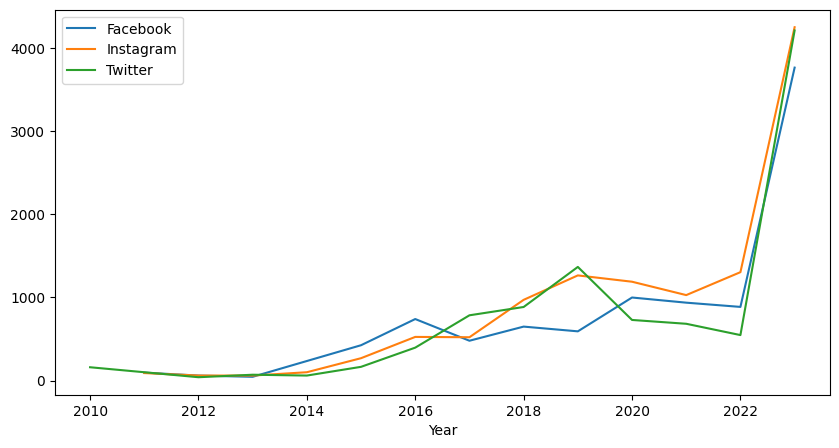

In [38]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=fb_likes_by_year.index, y=fb_likes_by_year.values, label='Facebook')
sns.lineplot(x=ig_likes_by_year.index, y=ig_likes_by_year.values, label='Instagram')
sns.lineplot(x=tw_likes_by_year.index, y=tw_likes_by_year.values, label='Twitter')

<BarContainer object of 3 artists>

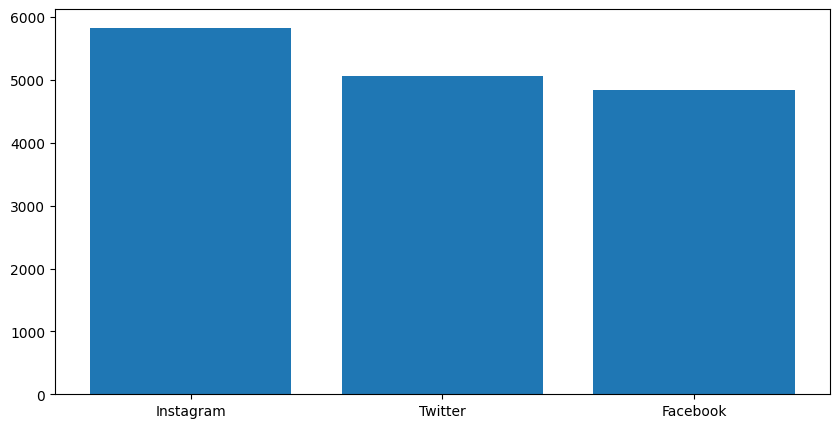

In [23]:
retweet_from_social = data.groupby('Platform')['Retweets'].sum().sort_values(ascending=False)
retweet_from_social

plt.figure(figsize=(10, 5))
plt.bar(retweet_from_social.index, retweet_from_social.values)

In [35]:
fb_retweets_by_year = data[data['Platform'] == 'Facebook'].groupby('Year')['Retweets'].sum()
fb_retweets_by_year

Year
2011      47.0
2012      30.0
2013      22.0
2015     214.0
2016     374.0
2017     240.0
2018     326.0
2019     294.0
2020     498.0
2021     468.0
2022     443.0
2023    1888.0
Name: Retweets, dtype: float64

In [36]:
ig_retweets_by_year = data[data['Platform'] == 'Instagram'].groupby('Year')['Retweets'].sum()
ig_retweets_by_year

Year
2011      44.0
2012      30.0
2013      30.0
2014      50.0
2015     137.0
2016     262.0
2017     260.0
2018     485.0
2019     633.0
2020     595.0
2021     515.0
2022     651.0
2023    2139.0
Name: Retweets, dtype: float64

In [37]:
tw_retweets_by_year = data[data['Platform'] == 'Twitter'].groupby('Year')['Retweets'].sum()
tw_retweets_by_year

Year
2010      80.0
2012      20.0
2013      36.0
2014      30.0
2015      83.0
2016     200.0
2017     392.0
2018     442.0
2019     684.0
2020     365.0
2021     343.0
2022     273.0
2023    2121.0
Name: Retweets, dtype: float64

<Axes: xlabel='Year'>

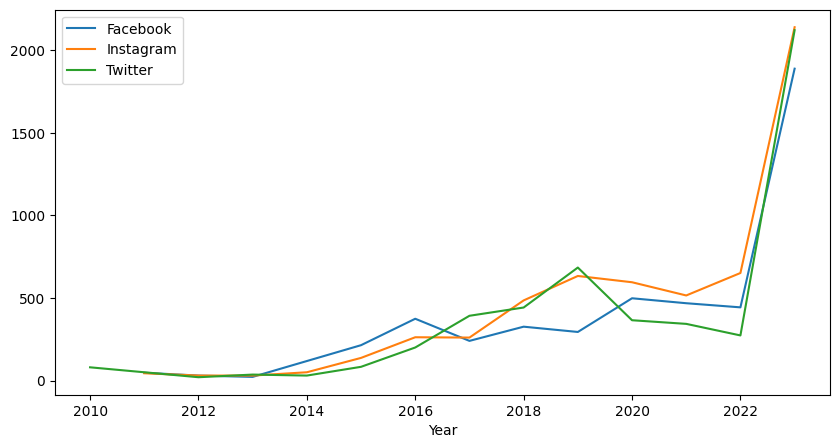

In [39]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=fb_retweets_by_year.index, y=fb_retweets_by_year.values, label='Facebook')
sns.lineplot(x=ig_retweets_by_year.index, y=ig_retweets_by_year.values, label='Instagram')
sns.lineplot(x=tw_retweets_by_year.index, y=tw_retweets_by_year.values, label='Twitter')

In [41]:
fb_hashtag = data[data['Platform'] == 'Facebook']['Hashtags'].value_counts()
fb_hashtag

#Playful #CarnivalEscapade               3
#Shame #Injustice                        2
#Radiance #SpringBlooms                  2
#Inspiration #ForestWhispers             2
#Gratitude #FamilyLaughter               2
                                        ..
#Determination #ExtraordinaryPath        1
#Indifference #DriftingThroughLife       1
#Melancholy #WistfulYearning             1
#Acceptance #UnpredictableArt            1
#CulturalCelebration #HighSchoolUnity    1
Name: Hashtags, Length: 220, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '#Playful #CarnivalEscapade'),
  Text(1, 0, '#Shame #Injustice'),
  Text(2, 0, '#Radiance #SpringBlooms'),
  Text(3, 0, '#Inspiration #ForestWhispers'),
  Text(4, 0, '#Gratitude #FamilyLaughter'),
  Text(5, 0, '#Awe #ArchitecturalGrandeur'),
  Text(6, 0, '#Loneliness #SolitaryNocturne'),
  Text(7, 0, '#Empathetic #LanternOfCompassion'),
  Text(8, 0, '#Confident #DanceOfLife'),
  Text(9, 0, '#Inspired #TalesToTheStars')])

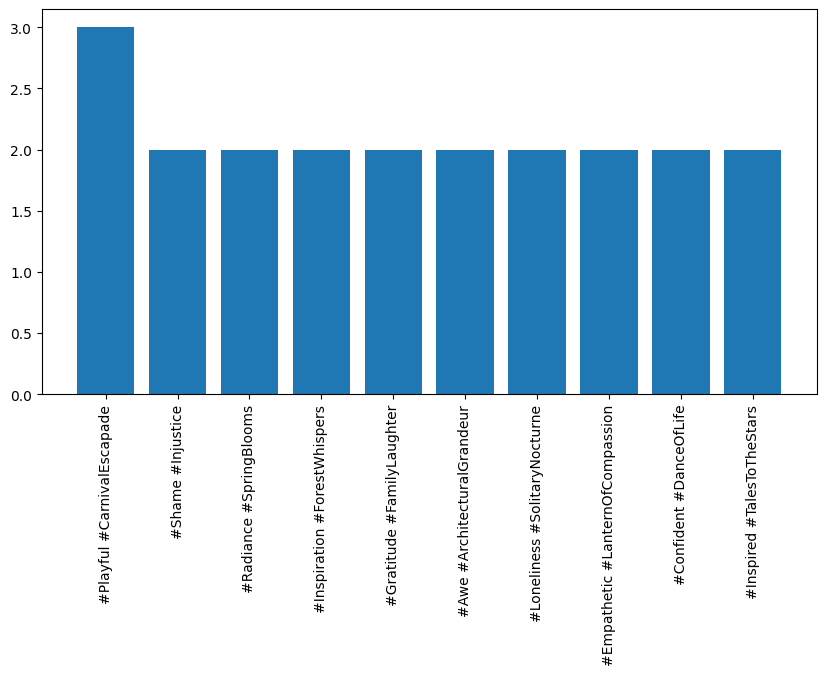

In [45]:
top_fb_hashtag = fb_hashtag.nlargest(10)
top_fb_hashtag

plt.figure(figsize=(10, 5))
plt.bar(top_fb_hashtag.index, top_fb_hashtag.values)
plt.xticks(rotation=90)

In [46]:
ig_hashtag = data[data['Platform'] == 'Instagram']['Hashtags'].value_counts()
ig_hashtag

#Hopeful #SeedsOfOptimism                      3
#Wonder #StargazingAdventure                   2
#Numbness #EmotionalStorms                     2
#Playful #JugglingResponsibilities             2
#Grateful #GoldenHues                          2
                                              ..
#Empathetic #TapestryOfUnderstanding           1
#FreeSpirit #PaintingTheSky                    1
#Confident #FootprintsOfAssuredness            1
#Curiosity #LabyrinthOfQuestions               1
#VirtualEntertainment #HighSchoolPositivity    1
Name: Hashtags, Length: 247, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '#Hopeful #SeedsOfOptimism'),
  Text(1, 0, '#Wonder #StargazingAdventure'),
  Text(2, 0, '#Numbness #EmotionalStorms'),
  Text(3, 0, '#Playful #JugglingResponsibilities'),
  Text(4, 0, '#Grateful #GoldenHues'),
  Text(5, 0, '#Contentment #TranquilWaters'),
  Text(6, 0, '#Dismissive #IndifferencePerformance'),
  Text(7, 0, '#Compassionate #TearsOfEmpathy'),
  Text(8, 0, '#Coziness #WarmWinterEvening'),
  Text(9, 0, '#Harmony #MusicalUnity')])

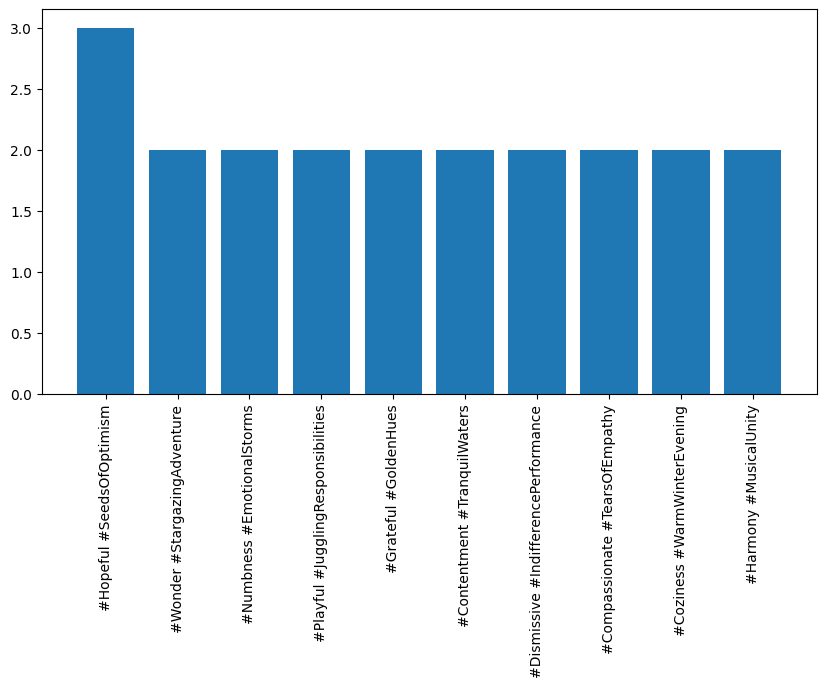

In [48]:
top_ig_hashtag = ig_hashtag.nlargest(10)
top_ig_hashtag

plt.figure(figsize=(10, 5))
plt.bar(top_ig_hashtag.index, top_ig_hashtag.values)
plt.xticks(rotation=90)

In [49]:
tw_hashtag = data[data['Platform'] == 'Twitter']['Hashtags'].value_counts()
tw_hashtag

#Proud #ScalingPeaks                        3
#Rejuvenation #SeasideEscape                2
#Hopeful #SailorOfDreams                    2
#FreeSpirit #WingsOfDreams                  2
#Inspired #CloudsOfCreativity               2
                                           ..
#Determination #SculptingDreams             1
#Zest #CarefreeSpirit                       1
#Proud #BranchesOfAchievement               1
#Compassionate #ShowerOfEmpathy             1
#CommunityGiving #HighSchoolPhilanthropy    1
Name: Hashtags, Length: 235, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '#Proud #ScalingPeaks'),
  Text(1, 0, '#Rejuvenation #SeasideEscape'),
  Text(2, 0, '#Hopeful #SailorOfDreams'),
  Text(3, 0, '#FreeSpirit #WingsOfDreams'),
  Text(4, 0, '#Inspired #CloudsOfCreativity'),
  Text(5, 0, '#Love #SpreadLove'),
  Text(6, 0, '#Hopeful #BrighterTomorrows'),
  Text(7, 0, '#Satisfaction #FulfillingEnding'),
  Text(8, 0, '#Inspiration #HiddenGemDiscovery'),
  Text(9, 0, '#Obstacle #CyclingFrustration')])

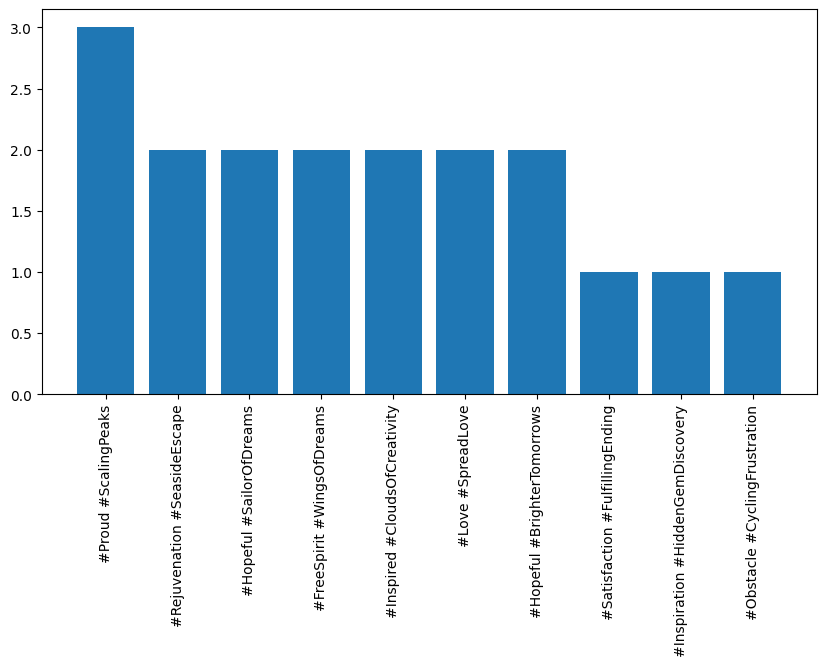

In [51]:
top_tw_hashtag = tw_hashtag.nlargest(10)
top_tw_hashtag

plt.figure(figsize=(10, 5))
plt.bar(top_tw_hashtag.index, top_tw_hashtag.values)
plt.xticks(rotation=90)

In [55]:
fb_platform = data[data['Platform'] == 'Facebook']
ig_platform = data[data['Platform'] == 'Instagram']
tw_platform = data[data['Platform'] == 'Twitter']

In [62]:
sw = stopwords.words('english')

def text_preprocessing(text):
    text = text.lower()

    text = ' '.join([word for word in text.split(' ') if word not in sw])

    text = re.sub('[^a-zA-Z\s]', '', text)

    return text

C:\Users\Admin\AppData\Local\Temp\ipykernel_31200\2338167123.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fb_platform['Text'] = fb_platform['Text'].apply(text_preprocessing)


In [75]:
def create_wordcloud(text):
    # x, y = np.ogrid[:300, :300]
    # mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
    # mask = 255 * mask.astype(int)
    
    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)

    plt.show()

In [63]:
fb_platform['Text'] = fb_platform['Text'].apply(text_preprocessing)
fb_platform

C:\Users\Admin\AppData\Local\Temp\ipykernel_31200\657117944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fb_platform['Text'] = fb_platform['Text'].apply(text_preprocessing)


,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
3,excited upcoming weekend getaway,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
6,rainy days call cozy blankets hot cocoa,Positive,2023-01-16 14:45:00,RainyDays,Facebook,#RainyDays #Cozy,10.0,20.0,Canada,2023,1,16,14
9,missing summer vibes beach days,Neutral,2023-01-17 12:20:00,BeachLover,Facebook,#Summer #BeachDays,18.0,35.0,Australia,2023,1,17,12
12,exploring citys hidden gems,Positive,2023-01-18 14:50:00,UrbanExplorer,Facebook,#CityExplore #HiddenGems,12.0,25.0,UK,2023,1,18,14
15,reflecting past looking ahead,Positive,2023-01-19 13:20:00,Reflections,Facebook,#Reflection #Future,20.0,40.0,USA,2023,1,19,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,collaborating group project promote teamwork s...,Neutral,2023-10-14 17:30:00,GroupProjectCollaborationHighSchool,Facebook,#TeamSpirit #HighSchoolProjects,18.0,35.0,USA,2023,10,14,17
720,attending school talent show support classmate...,Happy,2023-10-18 16:45:00,TalentShowSupportHighSchool,Facebook,#TalentShow #HighSchoolEntertainment,19.0,38.0,Canada,2023,10,18,16
723,receiving heartfelt letter pen pal another cou...,Happy,2023-10-21 17:30:00,PenPalConnectionHighSchool,Facebook,#GlobalFriendship #HighSchoolCorrespondence,23.0,45.0,Canada,2023,10,21,17
727,collaborating science project received recogni...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18


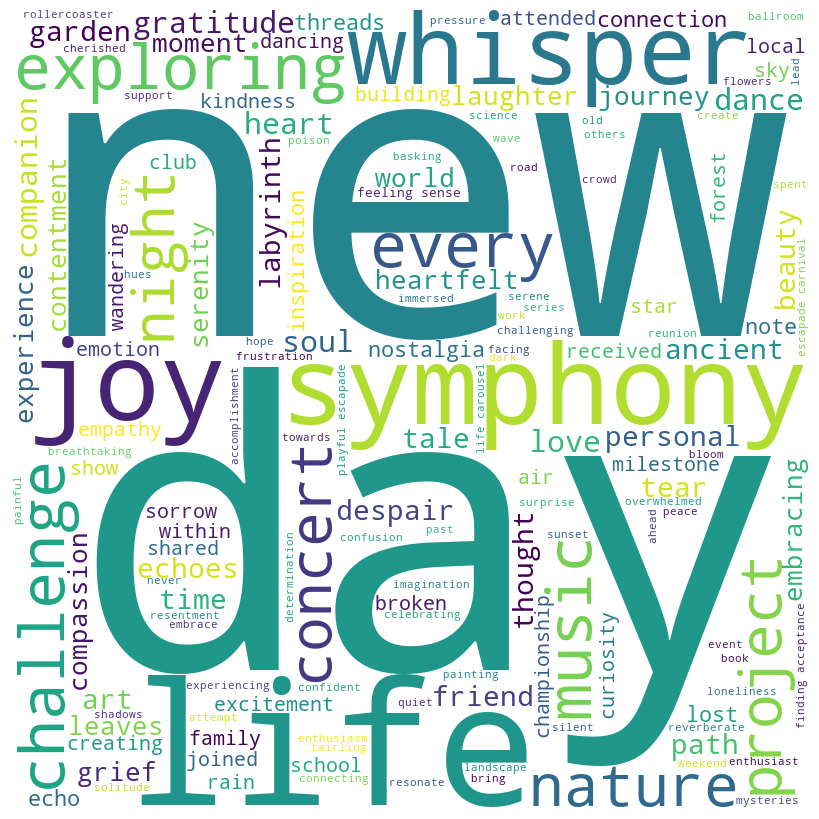

In [76]:
fb_wordcloud = create_wordcloud(' '.join(fb_platform['Text']))

In [87]:
fb_sentiment = fb_platform.groupby('Sentiment')['Text'].count().sort_values(ascending=False)
fb_sentiment

Sentiment
Joy            20
Positive       16
Excitement     11
Gratitude       7
Contentment     6
               ..
LostLove        1
Ecstasy         1
Motivation      1
Fearful         1
Yearning        1
Name: Text, Length: 99, dtype: int64

<BarContainer object of 10 artists>

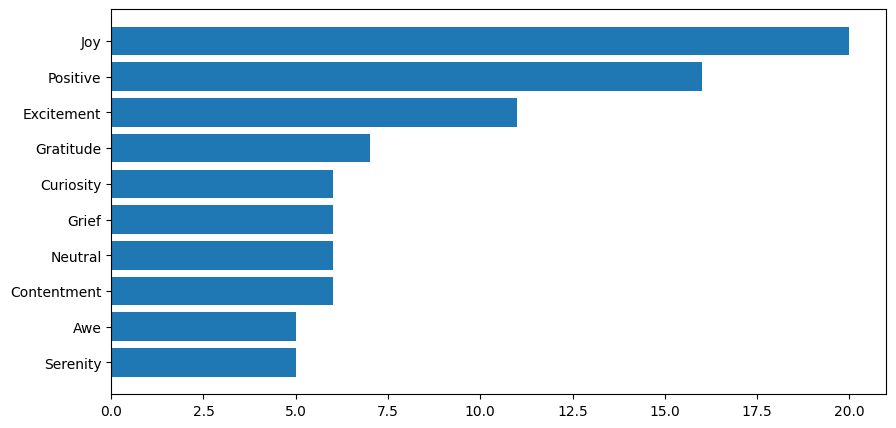

In [85]:
fb_most_sentiment = fb_sentiment.nlargest(10).sort_values()

plt.figure(figsize=(10, 5))
plt.barh(fb_most_sentiment.index, fb_most_sentiment.values)

In [64]:
ig_platform['Text'] = ig_platform['Text'].apply(text_preprocessing)
ig_platform

C:\Users\Admin\AppData\Local\Temp\ipykernel_31200\2275109996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ig_platform['Text'] = ig_platform['Text'].apply(text_preprocessing)


,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
2,finished amazing workout,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
4,trying new recipe dinner tonight,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
7,new movie release mustwatch,Positive,2023-01-16 19:30:00,MovieBuff,Instagram,#MovieNight #MustWatch,15.0,30.0,USA,2023,1,16,19
10,published new blog post check out,Positive,2023-01-17 15:15:00,BloggerX,Instagram,#Blogging #NewPost,22.0,45.0,USA,2023,1,17,15
13,new year new fitness goals,Positive,2023-01-18 18:00:00,FitJourney,Instagram,#NewYear #FitnessGoals,28.0,55.0,USA,2023,1,18,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,exploring new hiking trail friends weekend nat...,Happy,2023-10-19 18:20:00,WeekendHikeHighSchool,Instagram,#NatureAdventures #HighSchoolFriends,21.0,42.0,UK,2023,10,19,18
724,creating beautiful mural fellow art enthusiast...,Happy,2023-10-22 20:45:00,MuralCreationHighSchool,Instagram,#ArtCollaboration #HighSchoolCreativity,22.0,43.0,UK,2023,10,22,20
725,participating schoolwide art exhibition witnes...,Happy,2015-11-10 16:45:00,ArtExhibitionJoyHighSchool,Instagram,#ArtisticExpression #HighSchoolCreativity,23.0,44.0,USA,2015,11,10,16
728,attending surprise birthday party organized fr...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14


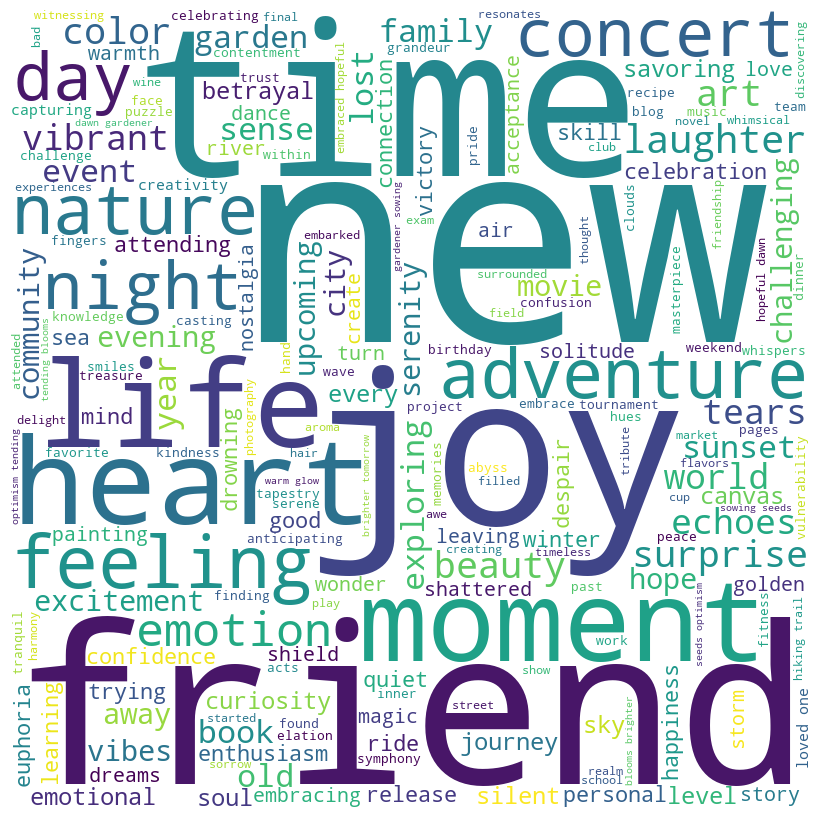

In [77]:
ig_wordcloud = create_wordcloud(' '.join(ig_platform['Text']))

In [88]:
ig_sentiment = ig_platform.groupby('Sentiment')['Text'].count().sort_values(ascending=False)
ig_sentiment

Sentiment
Positive       16
Joy            14
Excitement     13
Contentment     7
Curiosity       6
               ..
Loss            1
Marvel          1
Empathetic      1
Mindfulness     1
Zest            1
Name: Text, Length: 117, dtype: int64

<BarContainer object of 10 artists>

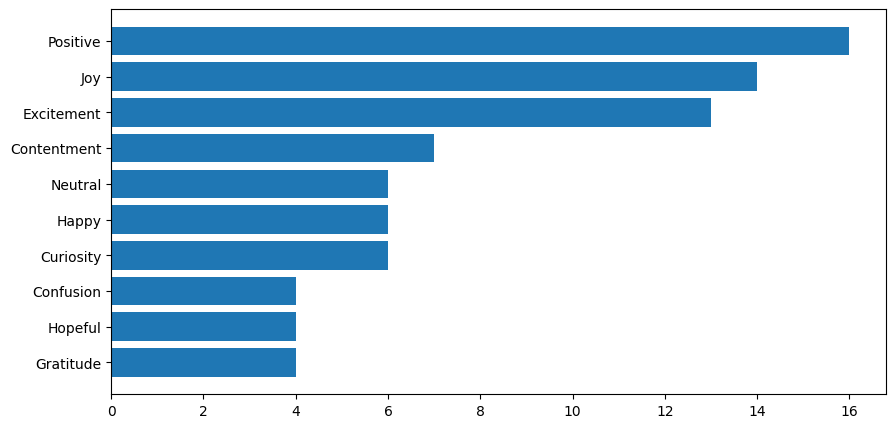

In [89]:
ig_most_sentiment = ig_sentiment.nlargest(10).sort_values()

plt.figure(figsize=(10, 5))
plt.barh(ig_most_sentiment.index, ig_most_sentiment.values)

In [65]:
tw_platform['Text'] = tw_platform['Text'].apply(text_preprocessing)
tw_platform

C:\Users\Admin\AppData\Local\Temp\ipykernel_31200\3798253684.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tw_platform['Text'] = tw_platform['Text'].apply(text_preprocessing)


,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,enjoying beautiful day park,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,traffic terrible morning,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
5,feeling grateful little things life,Positive,2023-01-16 09:10:00,GratitudeNow,Twitter,#Gratitude #PositiveVibes,25.0,50.0,India,2023,1,16,9
8,political discussions heating timeline,Negative,2023-01-17 08:00:00,DebateTalk,Twitter,#Politics #Debate,30.0,60.0,USA,2023,1,17,8
11,feeling bit weather today,Negative,2023-01-18 10:30:00,WellnessCheck,Twitter,#SickDay #Health,7.0,15.0,Canada,2023,1,18,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,participating debate club enhance critical thi...,Neutral,2023-10-15 20:45:00,DebateClubParticipationHighSchool,Twitter,#DebateSkills #HighSchoolIntellect,22.0,43.0,Canada,2023,10,15,20
719,successfully completing challenging coding pro...,Happy,2023-10-17 12:30:00,CodingSuccessHighSchool,Twitter,#CodingTriumph #HighSchoolTech,24.0,48.0,USA,2023,10,17,12
722,winning friendly sports competition rival scho...,Happy,2023-10-20 14:15:00,SportsVictoryHighSchool,Twitter,#SportsTriumph #HighSchoolAthletics,26.0,50.0,USA,2023,10,20,14
726,achieving personal best track field competitio...,Happy,2016-09-14 12:30:00,TrackFieldSuccessHighSchool,Twitter,#AthleticAchievement #HighSchoolSports,26.0,51.0,Canada,2016,9,14,12


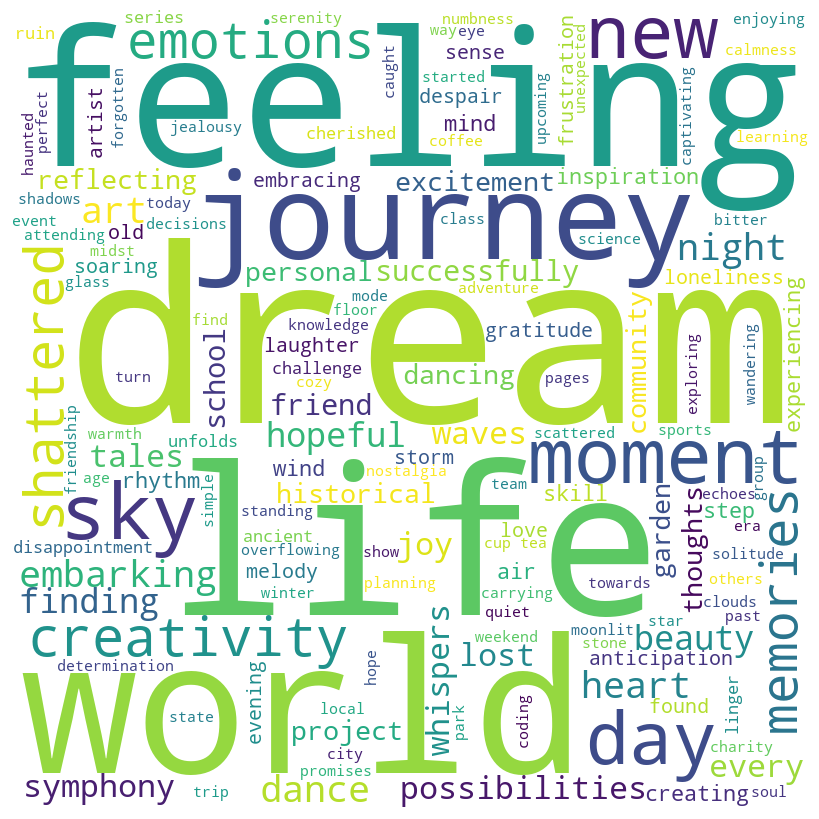

In [78]:
tw_wordcloud = create_wordcloud(' '.join(tw_platform['Text']))

In [90]:
tw_sentiment = tw_platform.groupby('Sentiment')['Text'].count().sort_values(ascending=False)
tw_sentiment

Sentiment
Positive               13
Excitement             13
Joy                    10
Gratitude               7
Contentment             6
                       ..
Envisioning History     1
Enthusiasm              1
Energy                  1
DreamChaser             1
Zest                    1
Name: Text, Length: 112, dtype: int64

<BarContainer object of 10 artists>

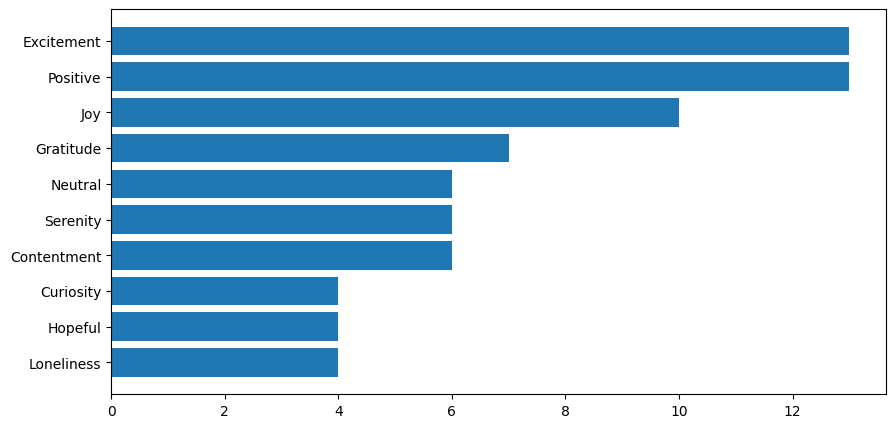

In [91]:
tw_most_sentiment = tw_sentiment.nlargest(10).sort_values()

plt.figure(figsize=(10, 5))
plt.barh(tw_most_sentiment.index, tw_most_sentiment.values)